# Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
gasturbines=pd.read_csv('C:/Users/hride/OneDrive/Desktop/Downloads/gas_turbines.csv')
gasturbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# 
Attribute Information: ### The explanations of sensor measurements and their brief statistics are given below. #### Variable (Abbr.) Unit Min Max Mean #### Ambient temperature (AT) C â€“6.23 37.10 17.71 #### Ambient pressure (AP) mbar 985.85 1036.56 1013.07 #### Ambient humidity (AH) (%) 24.08 100.20 77.87 #### Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93 #### Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56 #### Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43 #### Turbine after temperature (TAT) C 511.04 550.61 546.16 #### Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06 #### Turbine energy yield (TEY) MWH 100.02 179.50 133.51 #### Carbon monoxide (CO) mg/m3 0.00 44.10 2.37 #### Nitrogen oxides (NOX) mg/m3 25.90 119.91 65.29

In [3]:
gasturbines.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
gasturbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

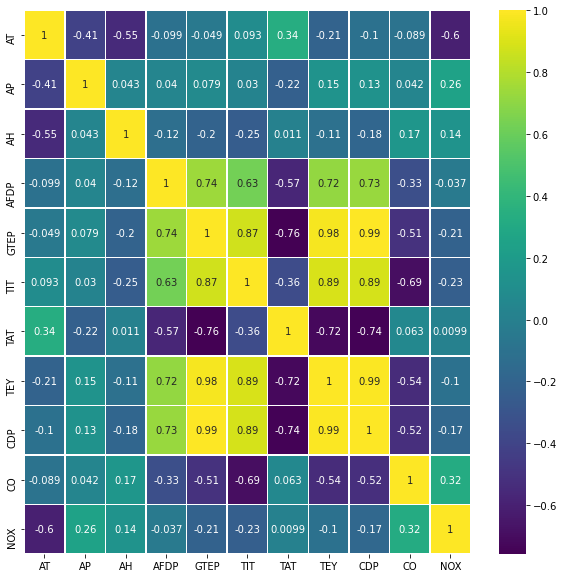

In [5]:
plt.figure(figsize = (10,10))
sns.heatmap(gasturbines.corr(),annot=True,cmap="viridis",linewidths=0.5)

In [6]:
# Finding Categorical Data :
print("The AT column")
print(gasturbines['AT'].value_counts())
print()
print("The AP column")
print(gasturbines['AP'].value_counts())
print()
print("The AH column")
print(gasturbines['AH'].value_counts())
print()
print("The AFDP column")
print(gasturbines['AFDP'].value_counts())
print()
print("The GTEP column")
print(gasturbines['GTEP'].value_counts())
print()
print("The TIT column")
print(gasturbines['TIT'].value_counts())
print()
print("The TAT column")
print(gasturbines['TAT'].value_counts())
print()
print("The TEY column")
print(gasturbines['TEY'].value_counts())
print()
print("The CDP column")
print(gasturbines['CDP'].value_counts())
print()
print("The CO column")
print(gasturbines['CO'].value_counts())
print()
print("The NOX column")
print(gasturbines['NOX'].value_counts())
print()

The AT column
19.6760    5
25.9690    5
20.7200    5
20.1350    5
14.0430    5
          ..
8.9396     1
26.3780    1
12.3200    1
8.6312     1
17.0010    1
Name: AT, Length: 12086, dtype: int64

The AP column
1011.80    129
1012.10    127
1011.90    121
1010.80    119
1013.60    118
          ... 
988.34       1
997.23       1
997.95       1
999.79       1
987.31       1
Name: AP, Length: 540, dtype: int64

The AH column
100.140    31
100.150    29
100.110    28
100.120    24
100.160    19
           ..
66.527      1
99.834      1
94.331      1
77.854      1
47.451      1
Name: AH, Length: 12637, dtype: int64

The AFDP column
4.5032    7
3.8837    6
4.2500    6
4.4361    6
4.4273    6
         ..
5.5648    1
4.1277    1
4.4199    1
4.2971    1
5.1631    1
Name: AFDP, Length: 11314, dtype: int64

The GTEP column
24.308    9
24.288    9
25.487    9
25.352    9
24.361    9
         ..
34.134    1
33.623    1
23.950    1
32.422    1
32.757    1
Name: GTEP, Length: 8234, dtype: int64

The 

In [7]:
gasturbines.shape

(15039, 11)

In [8]:
# Defining Predictors and Target Variables :
predictors_1 = gasturbines.iloc[:,0:7]
predictors_2 = gasturbines.iloc[:,8:]
predictors = predictors_1.join(predictors_2)

target = gasturbines.iloc[:,7]

In [9]:
predictors

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [10]:
target

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.3,random_state=0)

In [12]:
ann = tf.keras.models.Sequential()

In [13]:
#input layer + 1st hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
#adding 2nd layer
ann.add(tf.keras.layers.Dense(units =6,activation='relu'))
#adding the output layer
ann.add(tf.keras.layers.Dense(units=1))


#Training the ANN
#compililng the ANN
ann.compile(optimizer='adam',loss = 'mean_squared_error')

In [15]:
history = ann.fit(x_train,y_train,batch_size=32, epochs= 200)

Epoch 1/200
329/329 [==============================] - 0s 1ms/step - loss: 1.5713
Epoch 2/200
329/329 [==============================] - 0s 1ms/step - loss: 1.8322
Epoch 3/200
329/329 [==============================] - 0s 1ms/step - loss: 1.7577
Epoch 4/200
329/329 [==============================] - 0s 1ms/step - loss: 1.7202
Epoch 5/200
329/329 [==============================] - 0s 1ms/step - loss: 1.6789
Epoch 6/200
329/329 [==============================] - 0s 1ms/step - loss: 1.6082
Epoch 7/200
329/329 [==============================] - 0s 1ms/step - loss: 1.6879
Epoch 8/200
329/329 [==============================] - 0s 1ms/step - loss: 1.6799
Epoch 9/200
329/329 [==============================] - 0s 1ms/step - loss: 1.6624
Epoch 10/200
329/329 [==============================] - 0s 1ms/step - loss: 1.5746
Epoch 11/200
329/329 [==============================] - 0s 1ms/step - loss: 1.8107
Epoch 12/200
329/329 [==============================] - 0s 1ms/step - loss: 1.7138
Epoch 13/200


In [16]:
pred_train = ann.predict(np.array(x_train))
pred_train = pd.Series([i[0] for i in pred_train])
pred_train

0        124.411743
1        133.741028
2        134.536926
3        150.675873
4        134.405457
            ...    
10522    112.872711
10523    133.838165
10524    152.582825
10525    126.594063
10526    110.199234
Length: 10527, dtype: float64

In [18]:
# evaluate the model
scores = ann.evaluate(predictors, target)
print("%s: %.2f%%" % (ann.metrics_names[0], scores*200))

470/470 [==============================] - 0s 896us/step - loss: 1.3167
loss: 263.33%
